In [1]:
import os
import gc
import ot
import pickle
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse
from scipy.stats import spearmanr, pearsonr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

import commot as ct

In [3]:
adata_dis500=sc.read_h5ad('output_commot_intestine.h5ad')

IndexError: list index out of range

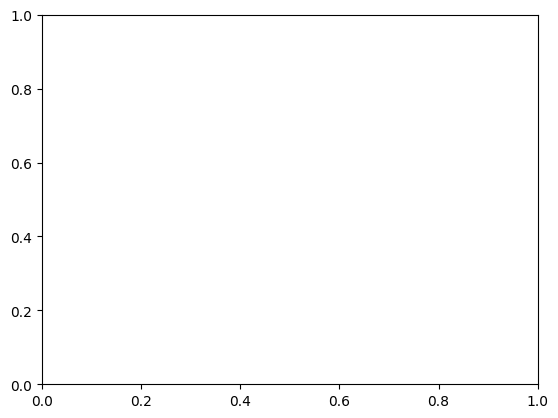

In [9]:
ct.tl.communication_direction(adata_dis500, database_name='nico_db', pathway_name='# natmi_primary# natmi_additional# omnipath', k=5)
ct.pl.plot_cell_communication(adata_dis500, database_name='nico_db', pathway_name='# natmi_primary# natmi_additional# omnipath', 
                              plot_method='grid', background_legend=True,
    scale=0.00003, ndsize=8, grid_density=0.4, summary='sender', background='image', 
                              clustering='nico_ct', cmap='Alphabet',
    normalize_v = True, normalize_v_quantile=0.995)

In [11]:
ct.tl.cluster_communication(adata_dis500, database_name='nico_db', pathway_name='total-total', clustering='nico_ct',
    n_permutations=100)

In [12]:
adata_dis500

AnnData object with n_obs × n_vars = 7367 × 241
    obs: 'nico_ct', 'sample'
    uns: 'commot-nico_db-info', 'log1p', 'commot_cluster-nico_ct-nico_db-total-total'
    obsm: 'commot-nico_db-sum-receiver', 'commot-nico_db-sum-sender', 'spatial', 'commot_sender_vf-nico_db-Cd14-Itgam', 'commot_receiver_vf-nico_db-Cd14-Itgam', 'commot_sender_vf-nico_db-# natmi_primary# natmi_additional# omnipath', 'commot_receiver_vf-nico_db-# natmi_primary# natmi_additional# omnipath'
    obsp: 'commot-nico_db-# natmi_additional', 'commot-nico_db-# natmi_primary# natmi_additional', 'commot-nico_db-# natmi_primary# natmi_additional# omnipath', 'commot-nico_db-Apob-Sdc1', 'commot-nico_db-Cadm1-Cadm1', 'commot-nico_db-Cd14-Itgam', 'commot-nico_db-Vcan-Cd44', 'commot-nico_db-Vim-Cd44', 'commot-nico_db-total-total'

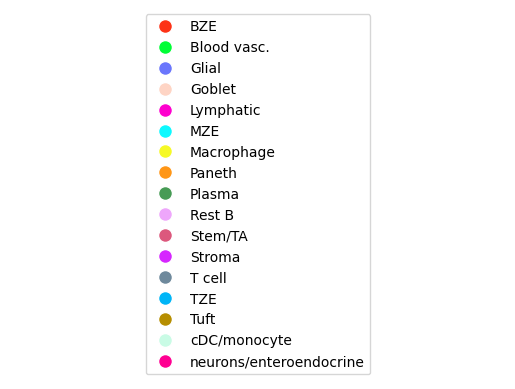

In [16]:
ct.pl.plot_cluster_communication_network(adata_dis500, uns_names=['commot_cluster-nico_ct-nico_db-total-total'],
    nx_node_pos=None, nx_bg_pos=False, p_value_cutoff = 5e-2, filename='total_cluster.pdf', nx_node_cmap='Light24')

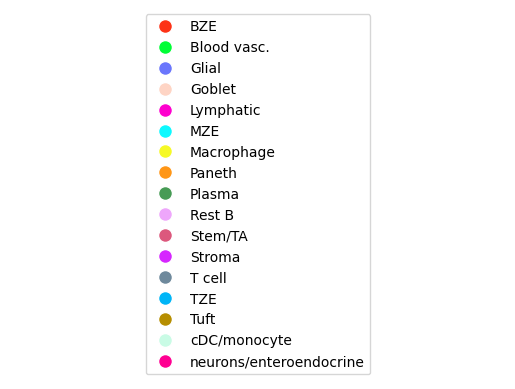

In [17]:
ct.tl.cluster_position(adata_dis500, clustering='nico_ct')
ct.pl.plot_cluster_communication_network(adata_dis500, uns_names=['commot_cluster-nico_ct-nico_db-total-total'], 
                clustering='nico_ct',
    nx_node_pos='cluster', nx_pos_idx=np.array([0, 1]), nx_bg_pos=True, nx_bg_ndsize=0.25, p_value_cutoff=5e-2,
    filename='PSAP_cluster_spatial.pdf', nx_node_cmap='Light24')